In [3]:
import mglearn
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Generate a synthetic dataset
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_clusters_per_class=1, flip_y=0.1, random_state=42)

# Visualize the dataset and decision boundaries of k-nearest neighbors
mglearn.plots.plot_knn_classification(n_neighbors=1)
plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', s=50, cmap=mglearn.cm2)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


ValueError: Number of informative, redundant and repeated features must sum to less than the number of total features

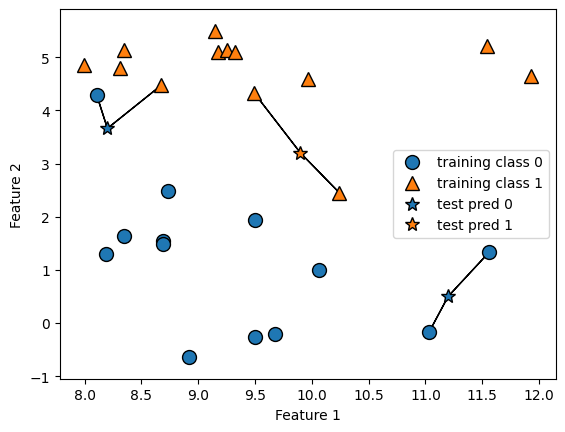

In [5]:
import mglearn
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Generate a synthetic dataset
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_clusters_per_class=1, n_informative=2, n_redundant=0, n_repeated=0, random_state=42)

# Visualize the dataset and decision boundaries of k-nearest neighbors
mglearn.plots.plot_knn_classification(n_neighbors=2)
plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', s=50, cmap=mglearn.cm2)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
